# Classification des cellules sanguines cancéreuses (PyTorch).

## 1️⃣ Importation et préparation des données

### Imports : 

In [67]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
from PIL import Image
import random
import os
import cv2
from typing import Counter


### Charger les images du dataset et vérifier leurs extensions (jpeg, jpg, bmp, png). Supprimer celles qui ne correspondent pas.

In [55]:
dataset_path = Path("../data/Blood_Cells_Cancer/")

valid_extensions = (".jpg", ".jpeg", ".png", ".bmp")

images = []
labels = []

In [56]:
problem_files = 0

for class_name in os.listdir(dataset_path):
    class_path = os.path.join(dataset_path, class_name)
    
    if os.path.isdir(class_path):
        for file_name in os.listdir(class_path):
            file_path = os.path.join(class_path, file_name)
            
            if file_name.lower().endswith(valid_extensions):
                
                try:
                    img = cv2.imread(file_path)
                    if img is not None:
                        images.append(img)
                        labels.append(class_name)
                    else:
                        problem_files += 1
                        print(f"Impossible de lire l'image : {file_path}")
                        # supprimer si le file ne s'ouvre pas
                        try:
                            os.remove(file_path)
                        except Exception as e:
                            print(f"Erreur lors de la suppression de {file_path} : {e}")
                        
                except Exception as e :
                    print(f"Erreur lors du chargement de {file_path} : {e}")
                    
            else:
                problem_files += 1
                print(f"Extension non valide, fichier {file_path}")
                # supprimer si le fichier n'a pas l'extension valide
                try:
                    os.remove(file_path)
                except Exception as e:
                    print(f"Erreur lors de la suppression de {file_path} : {e}")
                
        

In [57]:
print(f"Nombre total d'images valides : {len(images)}")
print(f"Nombre de fichiers problématiques : {problem_files}")

Nombre total d'images valides : 3242
Nombre de fichiers problématiques : 0


## 2️⃣ Exploration et visualisation du dataset

### Explorer les classes du dataset (les noms des dossiers représentent les classes).

In [ ]:
# Explorer les classes
classes = [d for d in os.listdir(dataset_path) if os.path.isdir(os.path.join(dataset_path, d))]

print(f"Les classes sont : {classes}")

Les classes sont : ['Benign', 'early Pre-B', 'Pre-B', 'Pro-B']


### Montrez un nombre d’échantillons dans chaque classe par countplot.

C:\Users\ramas\AppData\Local\Temp\ipykernel_18336\3260273223.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=labels, order=pd.Series(labels).value_counts().index, palette='viridis')


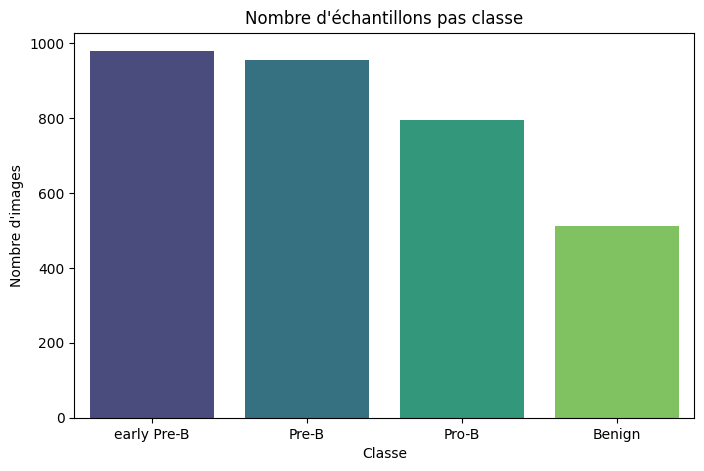

In [ ]:
# affichier les nombres des classes avec un plot
plt.figure(figsize=(8, 5))
sns.countplot(x=labels, order=pd.Series(labels).value_counts().index, palette='viridis')
plt.title("Nombre d'échantillons pas classe")
plt.xlabel("Classe")
plt.ylabel("Nombre d'images")
plt.show()

In [68]:
# Nombre des images par classe : 

class_counts = Counter(np.array(labels))
for class_name, count in class_counts.items():
    print(f"Classe '{class_name}' : {count} images")

Classe 'Benign' : 512 images
Classe 'early Pre-B' : 979 images
Classe 'Pre-B' : 955 images
Classe 'Pro-B' : 796 images


### Montrer un échantillon d’images pour chaque classe.

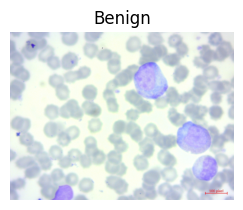

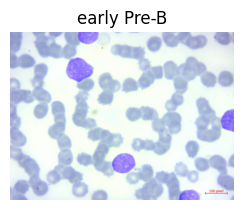

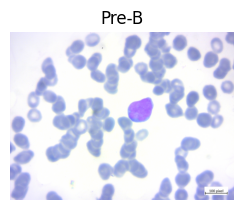

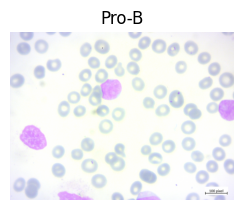

In [69]:
# Benign exp. image

img1_path = '../data/Blood_Cells_Cancer/Benign/Snap_027.jpg'

image = cv2.imread(img1_path)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
x_min, y_min, x_max, y_max = 300, 300, 450, 450

plt.subplot(2, 2, 1)
plt.imshow(image_rgb)
plt.title("Benign")
plt.axis('off')
plt.show()

# early Pre-B exp. image

img2_path = '../data/Blood_Cells_Cancer/early Pre-B/Sap_148 (51).jpg'

image = cv2.imread(img2_path)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
x_min, y_min, x_max, y_max = 300, 300, 450, 450

plt.subplot(2, 2, 1)
plt.imshow(image_rgb)
plt.title("early Pre-B")
plt.axis('off')
plt.show()


# Pre-B exp. image

img3_path = '../data/Blood_Cells_Cancer/Pre-B/Snap_009.jpg'

image = cv2.imread(img3_path)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
x_min, y_min, x_max, y_max = 300, 300, 450, 450

plt.subplot(2, 2, 1)
plt.imshow(image_rgb)
plt.title("Pre-B")
plt.axis('off')
plt.show()

# early Pro-B exp. image

img4_path = '../data/Blood_Cells_Cancer/Pro-B/Snap_013.jpg'

image = cv2.imread(img4_path)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
x_min, y_min, x_max, y_max = 300, 300, 450, 450

plt.subplot(2, 2, 1)
plt.imshow(image_rgb)
plt.title("Pro-B")
plt.axis('off')
plt.show()